<h1 style="color:pink;">Introduction</h1>

In this classification project, the dataset [diabetes_012_health_indicators_BRFSS2015.csv](https://www.kaggle.com/datasets) is utilized, which contains 253,680 clean survey responses from the CDC's 2015 Behavioral Risk Factor Surveillance System (BRFSS).

The target variable, Diabetes_012, consists of three classes:

0: No diabetes or only during pregnancy  
1: Prediabetes  
2: Diabetes

Additionally, the dataset comprises 21 feature variables. Several steps will be followed to select and optimize models for high performance and accuracy.


In [54]:
# Install the imbalanced-learn library for handling and analyzing imbalanced datasets
!pip install imblearn

# Install the XGBoost library for model building and prediction using the XGBoost algorithm
!pip install xgboost


<h1 style="color:pink;">1. Import Required Libraries</h1>

To work with the dataset and create visualizations, the following libraries are imported:

In [ ]:
 # Import essential libraries
import pandas as pd  # for handling data in DataFrame format
import numpy as np  # for numerical operations and array manipulation
import matplotlib.pyplot as plt  # for creating basic plots and visualizations
import seaborn as sns  # for enhanced visualizations and specific plot styles

<h1 style="color:pink;">2. Load Dataset</h1>



To load the dataset into a pandas DataFrame and preview the first few rows:

In [56]:
# Load the dataset into a DataFrame from a CSV file
df = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')

# Display the first 5 rows of the DataFrame to get an overview of the data
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


<h1 style="color:pink;">3. Data Exploratory Analysis (DEA) </h1>

The code below outputs the number of rows (samples) and columns (features) in the dataset. This helps in understanding the size and structure of the data before further analysis:

In [57]:
# Display the number of rows (samples) and columns (features) in the dataset
df.shape


(253680, 22)

The code below provides a summary of the dataset, including the column names, data types, and the number of non-null entries for each column. This is useful for understanding the structure of the data and identifying any missing values:

In [58]:
# Display basic information about the dataset, such as column names, data types, and non-null counts
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

The following code generates a statistical summary of the dataset, providing key descriptive statistics for each numerical column. It includes the count, mean, standard deviation, minimum, 25th percentile, median (50th percentile), 75th percentile, and maximum values:

In [59]:
# Display the statistical summary of the dataset, including count, mean, std, min, 25th percentile, median, 75th percentile, and max for each numerical column
df.describe()


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


<h1 style="color:pink;">4. Data Visualization</h1>

### **Distribution of Diabetes Categories**

This section visualizes the distribution of diabetes status categories (`Diabetes_012`) within the dataset.

### Steps in the Code:
1. **Plot Configuration**:
   - The figure size is set to `(4, 3)` for a compact and clear visualization.

2. **Count Plot Creation**:
   - A count plot is generated using the `seaborn` library to display the frequency of each category in the `Diabetes_012` column.
   - Categories represent:
     - `0`: No Diabetes
     - `1`: Prediabetes
     - `2`: Diabetes
   - The plot uses the `viridis` color palette to visually distinguish categories.

3. **Enhancements**:
   - The title of the plot provides a clear description of the visualization purpose.
   - The x-axis is labeled to explain the categories.
   - The y-axis is labeled to indicate the count of observations in each category.

### Visualization Purpose:
This plot helps to understand the distribution of diabetes statuses in the dataset. It provides a quick overview of whether the dataset is balanced or skewed towards certain categories.

### Output Example:
The resulting count plot will show:
- **X-axis**: Categories of diabetes status (`0`, `1`, and `2`).
- **Y-axis**: Count of observations for each category.
- **Colors**: Distinct hues for each category to enhance clarity.


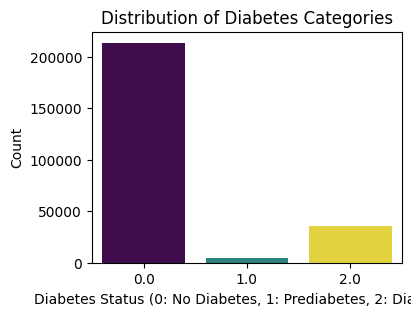

In [60]:
# 1. Distribution of Diabetes_012 categories
# Create a figure with a specific size
plt.figure(figsize=(4, 3))

# Create a count plot for the "Diabetes_012" column
#sns.countplot(data=df, x="Diabetes_012", palette="viridis")
sns.countplot(data=df, x="Diabetes_012", palette="viridis", hue="Diabetes_012", legend=False)

# Set the title of the plot
plt.title("Distribution of Diabetes Categories")

# Label the x-axis
plt.xlabel("Diabetes Status (0: No Diabetes, 1: Prediabetes, 2: Diabetes)")

# Label the y-axis
plt.ylabel("Count")

# Display the plot
plt.show()


### **Correlation Heatmap**

This section generates a heatmap to visualize the correlation between features in the dataset.

### Steps in the Code:
1. **Plot Configuration**:
   - The figure size is set to `(6, 5)` for optimal clarity of the heatmap.

2. **Correlation Matrix Calculation**:
   - The correlation matrix is computed using the `corr` method, which measures the strength and direction of relationships between numerical features.

3. **Heatmap Visualization**:
   - A heatmap is created using `seaborn` with the following customizations:
     - **Color Map**: The `"coolwarm"` colormap highlights positive and negative correlations.
     - **Color Bar**: A color bar is included to indicate the magnitude of correlations.
     - **Annotations**: Disabled (`annot=False`) for a clean look.

4. **Title**:
   - A descriptive title is added to explain the purpose of the plot.

### Visualization Purpose:
The heatmap provides insights into the relationships between features in the dataset. Strong positive correlations (close to +1) and strong negative correlations (close to -1) can guide feature selection, model building, and interpretation.

### Output Example:
The resulting heatmap will show:
- **Color Gradients**: Represent correlation values (blue for negative, red for positive).
- **X-axis and Y-axis**: Features in the dataset.
- **Color Bar**: Indicates correlation strength.


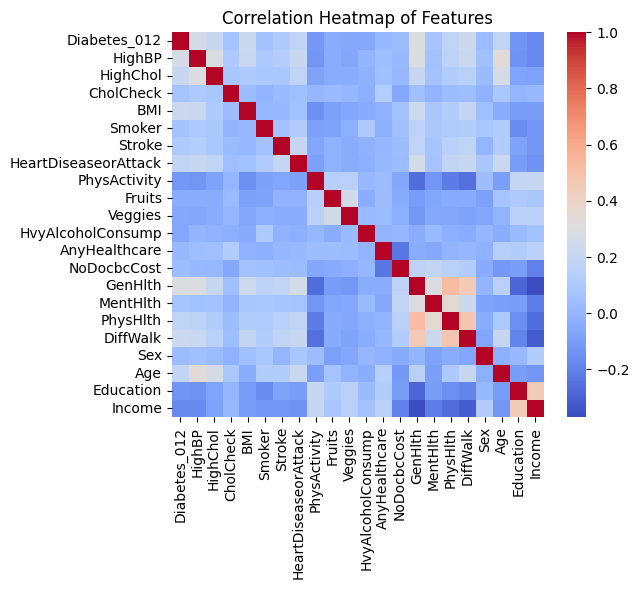

In [61]:
# 2. Correlation heatmap
# Create a figure with a specific size
plt.figure(figsize=(6, 5))

# Calculate the correlation matrix of the dataframe
corr = df.corr()

# Create a heatmap to visualize the correlation matrix
sns.heatmap(corr, annot=False, cmap="coolwarm", cbar=True, fmt=".2f")

# Set the title of the heatmap
plt.title("Correlation Heatmap of Features")

# Display the heatmap
plt.show()


###  **Proportion of High Blood Pressure (HighBP) and High Cholesterol (HighChol) by Diabetes Status** 

This section creates a bar plot to compare the proportions of individuals with High Blood Pressure (HighBP) and High Cholesterol (HighChol) across different diabetes statuses.

### Steps in the Code:
1. **Plot Configuration**:
   - The figure size is set to `(5, 3)` for a clear and concise visualization.

2. **Data Grouping**:
   - The dataset is grouped by the `Diabetes_012` column, representing different diabetes statuses (no diabetes, prediabetes, and diabetes).
   - The mean values for `HighBP` and `HighChol` are calculated for each diabetes status group.

3. **Data Transformation**:
   - The `melt` function is used to reshape the data, putting `HighBP` and `HighChol` into a single column (`Condition`) for easier plotting.

4. **Bar Plot Creation**:
   - A bar plot is generated using `seaborn`, displaying the proportions of HighBP and HighChol for each diabetes status group.
   - Different colors (`muted` palette) are used to differentiate between `HighBP` and `HighChol` conditions.

5. **Plot Enhancements**:
   - A title is added to the plot, explaining the focus on the relationship between diabetes status and these health conditions.
   - The x-axis and y-axis are labeled to provide clarity about the categories and the proportions.
   - A legend is included to indicate which color corresponds to which health condition.

### Visualization Purpose:
This bar plot provides a comparison of the prevalence of High Blood Pressure and High Cholesterol in individuals with different diabetes statuses. It allows for easy visualization of how these conditions vary across the categories.

### Output Example:
The resulting bar plot will show:
- **X-axis**: Diabetes status categories (`0`, `1`, `2`).
- **Y-axis**: Proportions of individuals with HighBP and HighChol.
- **Legend**: Distinguishes between `HighBP` and `HighChol` conditions.
- **Colors**: Different hues for the two conditions.


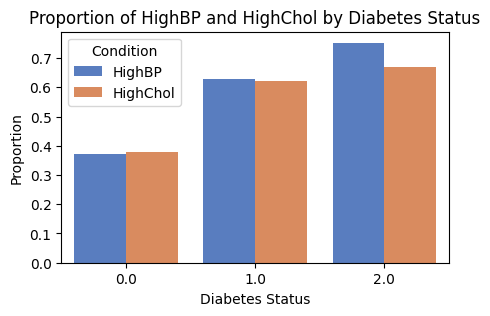

In [62]:
# 3. Bar plot of HighBP and HighChol by Diabetes Status
plt.figure(figsize=(5, 3))

# Group the dataset by 'Diabetes_012' and calculate mean values for 'HighBP' and 'HighChol'
highbp_chol = df.groupby("Diabetes_012")[["HighBP", "HighChol"]].mean().reset_index()

# Melt the data so that 'HighBP' and 'HighChol' are in the same column for easier plotting
highbp_chol_melted = highbp_chol.melt(id_vars=["Diabetes_012"], value_vars=["HighBP", "HighChol"], 
                                      var_name="Condition", value_name="Proportion")

# Create a bar plot showing the proportions of HighBP and HighChol by Diabetes Status
sns.barplot(data=highbp_chol_melted, x="Diabetes_012", y="Proportion", hue="Condition", palette="muted")

# Add title and labels
plt.title("Proportion of HighBP and HighChol by Diabetes Status")
plt.xlabel("Diabetes Status")
plt.ylabel("Proportion")

# Show the legend
plt.legend(title="Condition")

# Display the plot
plt.show()


### **BMI Distribution by Diabetes Status**

In this section, we visualize the distribution of Body Mass Index (BMI) values across different diabetes status categories.

### Steps in the Code:
1. **Plot Configuration**:
   - A figure of size `(10, 6)` is created to ensure clear visibility of the plot.

2. **Histogram Creation**:
   - The `sns.histplot` function from `seaborn` is used to create a histogram:
     - **`data=df`**: Specifies the dataset to be used.
     - **`x="BMI"`**: The `x` parameter sets the variable for which we want to plot the histogram (BMI values).
     - **`hue="Diabetes_012"`**: The `hue` parameter is used to differentiate the histogram by diabetes status, coloring the bars according to the three categories (`0` for no diabetes, `1` for prediabetes, and `2` for diabetes).
     - **`kde=True`**: The Kernel Density Estimate (KDE) is added to the histogram to provide a smoother representation of the distribution.
     - **`palette="husl"`**: Uses the "husl" color palette to ensure clear differentiation of the three categories.
     - **`element="step"`**: Creates a step-based histogram, useful for comparing distribution shapes across different groups.

3. **Plot Enhancements**:
   - A title is added to the plot to indicate that it shows the distribution of BMI by diabetes status.
   - The x-axis is labeled as "BMI" for clarity.
   - The y-axis is labeled as "Density" to represent the density of the BMI observations.

### Visualization Purpose:
This plot aims to illustrate the distribution of BMI values among individuals categorized by their diabetes status. It helps to understand how BMI varies between those with no diabetes, prediabetes, and diabetes.

### Output Example:
The resulting histogram will show:
- **X-axis**: BMI values.
- **Y-axis**: Density of BMI observations.
- **Colors**: Different hues representing the three diabetes status categories (`0` for no diabetes, `1` for prediabetes, and `2` for diabetes).
- **KDE**: A smooth curve overlay indicating the density distribution of BMI within each diabetes category.


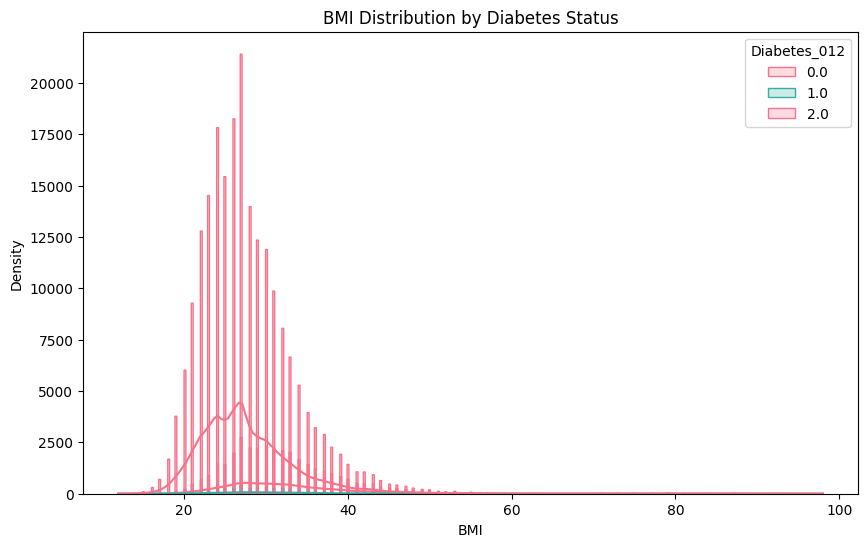

In [63]:
# 4. BMI distribution by Diabetes Status
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="BMI", hue="Diabetes_012", kde=True, palette="husl", element="step")
plt.title("BMI Distribution by Diabetes Status")
plt.xlabel("BMI")
plt.ylabel("Density")
plt.show()


### **Age Distribution by Diabetes Status**

In this section, we create a boxplot to visualize the distribution of ages across different diabetes status categories.

### Steps in the Code:
1. **Plot Configuration**:
   - A figure of size `(10, 6)` is created to ensure the plot is large enough for clarity and ease of interpretation.

2. **Boxplot Creation**:
   - The `sns.boxplot` function from `seaborn` is used to create the boxplot:
     - **`data=df`**: Specifies the dataset to be used.
     - **`x="Diabetes_012"`**: The `x` parameter represents the diabetes status categories, where:
       - `0`: No Diabetes
       - `1`: Prediabetes
       - `2`: Diabetes
     - **`y="Age"`**: The `y` parameter represents the age of individuals.
     - **`palette="pastel"`**: The "pastel" color palette is used for the boxplot, making it visually appealing.

3. **Plot Enhancements**:
   - A title is added to the plot to clearly indicate that it shows the age distribution by diabetes status.
   - The x-axis is labeled as "Diabetes Status" to reflect the three diabetes status categories.
   - The y-axis is labeled as "Age Category (1: 18-24, ..., 13: 80+)", which provides information about the age categories represented in the data.

### Visualization Purpose:
This boxplot aims to show the distribution of age for individuals categorized by their diabetes status. It provides insights into the central tendency (median), spread (interquartile range), and any potential outliers in the data for each group.

### Output Example:
The resulting boxplot will display:
- **X-axis**: The diabetes status categories (No Diabetes, Prediabetes, and Diabetes).
- **Y-axis**: The age distribution of individuals in each diabetes status category.
- **Boxplots**: Each box represents the interquartile range (IQR) of the age distribution, with the median marked inside the box. Whiskers indicate the range of ages, and any points outside the whiskers are considered potential outliers.


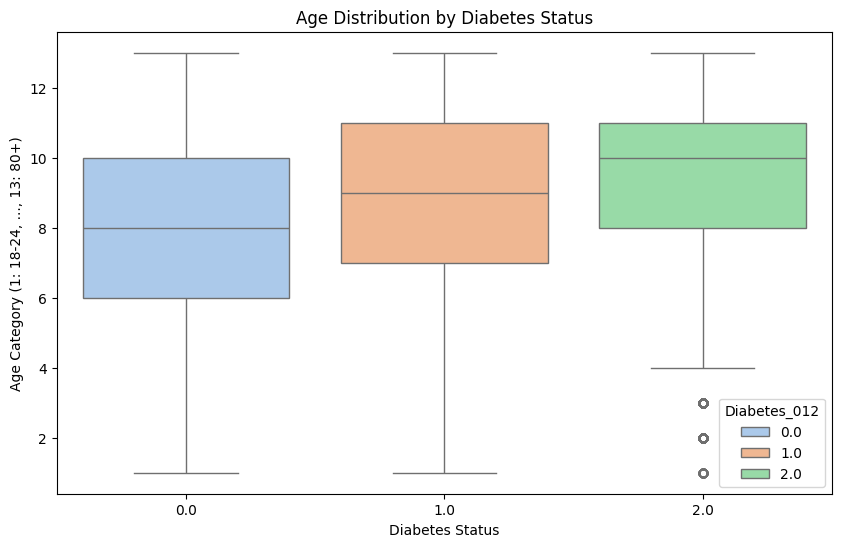

In [64]:
# 5. Boxplot of Age by Diabetes Status
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Diabetes_012", y="Age", palette="pastel", hue="Diabetes_012")
plt.title("Age Distribution by Diabetes Status")
plt.xlabel("Diabetes Status")
plt.ylabel("Age Category (1: 18-24, ..., 13: 80+)")
plt.show()


### **Distributions of Attributes**

The following code generates a histogram for each attribute in the dataset to visualize their distributions:


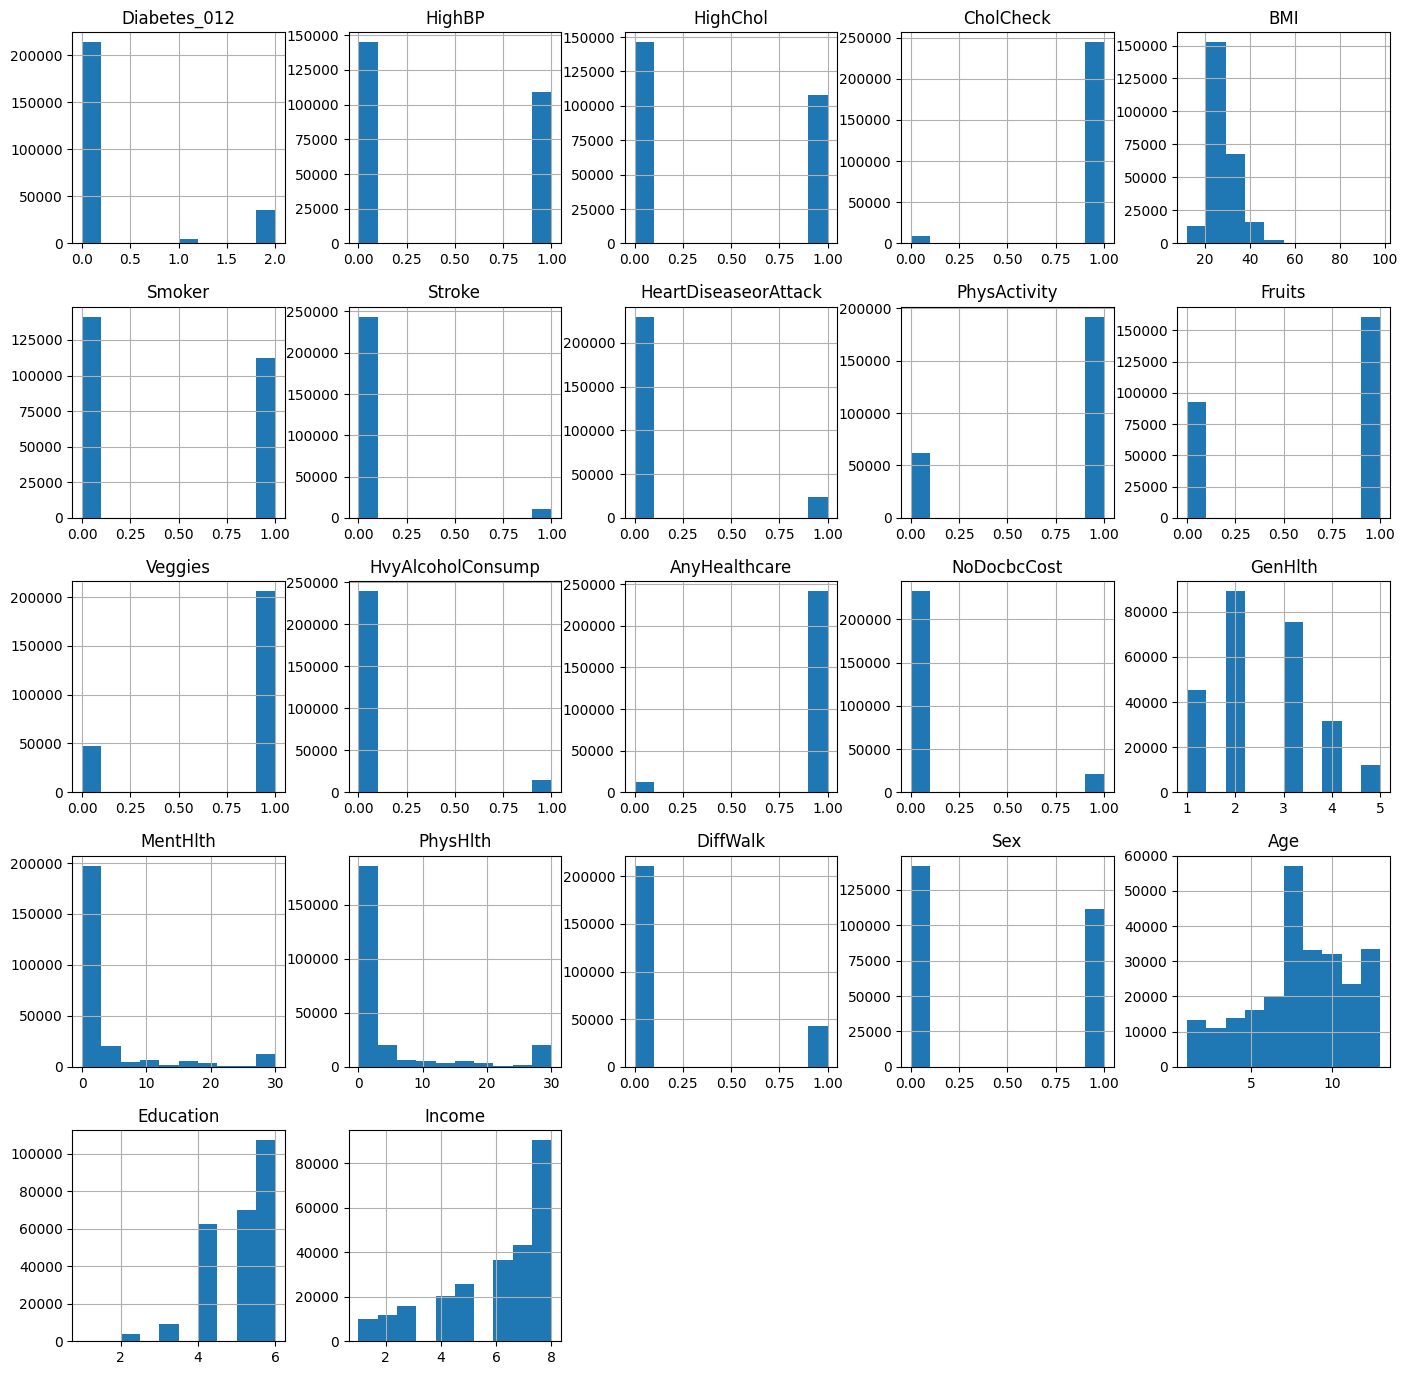

In [65]:
# Distributions of attributes 
df.hist(figsize = (17, 17))  # Create histograms for all columns in the DataFrame
plt.show()  # Display the histograms

### **Pairplot of Selected Attributes to Visualize Relationships and Distributions**

This code creates a pairplot to visualize the relationships and distributions of selected features in the dataset, specifically: BMI, HighBP, HighChol, Physical Activity, Age, and Diabetes Status. The `hue` parameter is set to `Diabetes_012`, which helps in visualizing how these features differ across diabetes categories.

- **Features Analyzed**: BMI, HighBP, HighChol, PhysActivity, Age, Diabetes Status
- **Purpose**: To explore the relationships between selected features and identify any patterns related to diabetes status.


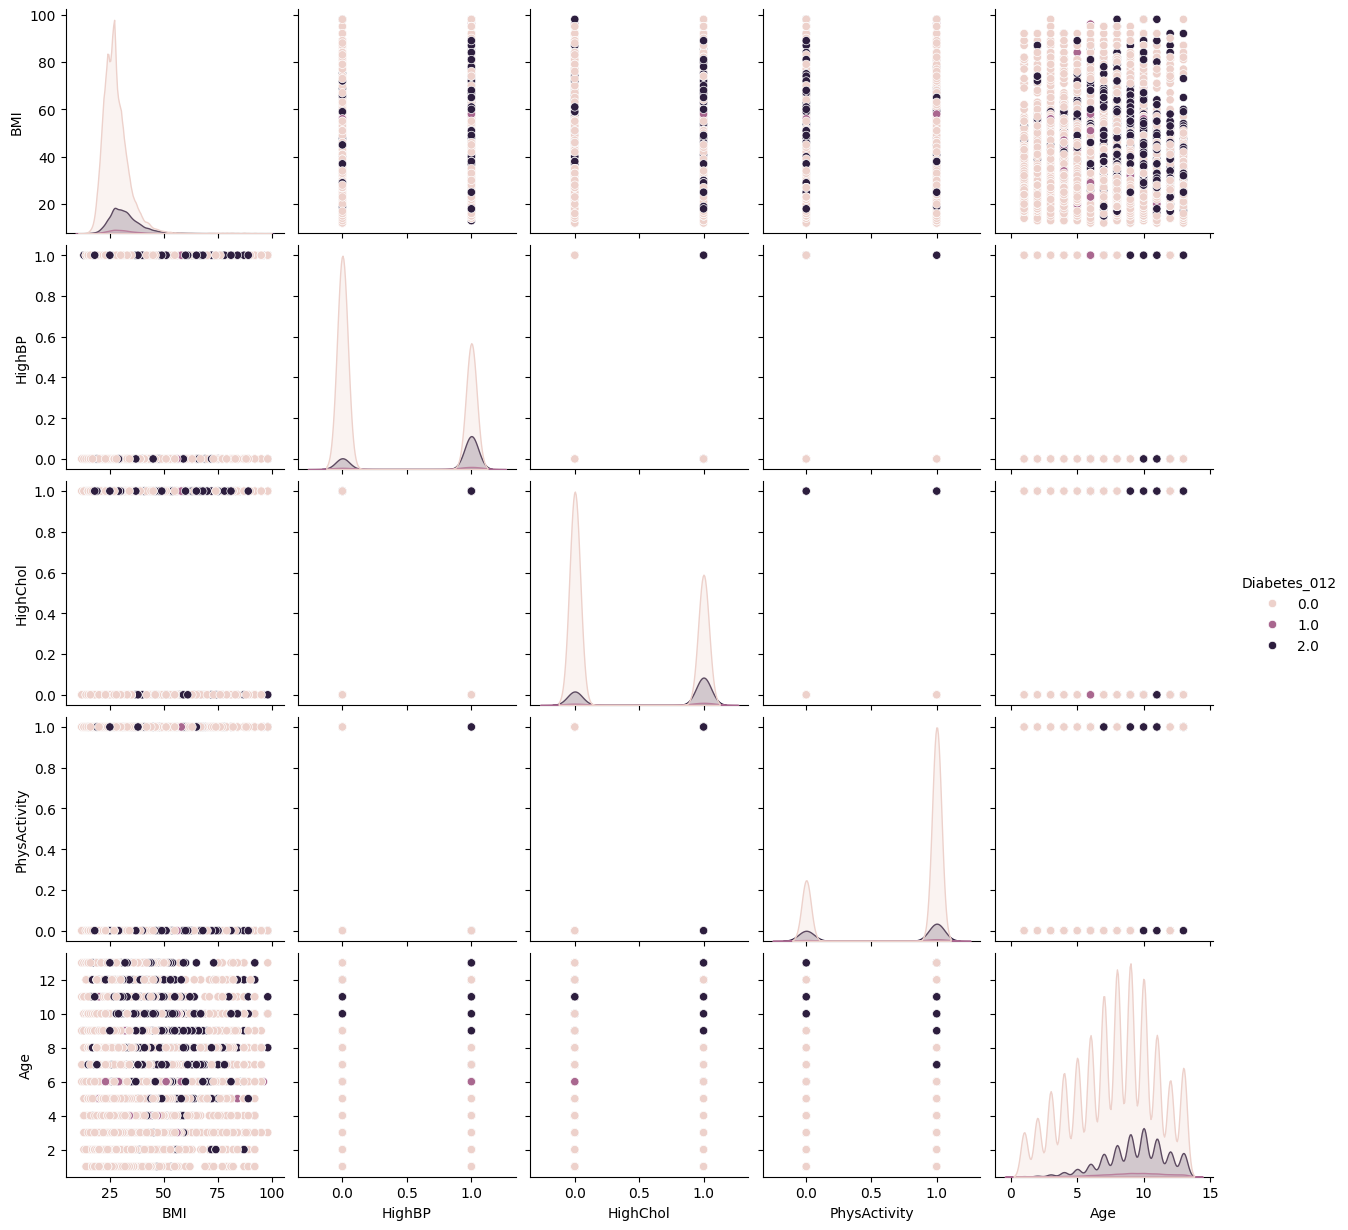

In [66]:
# Pairplot of selected attributes to visualize relationships and distributions
selected_features = df[['BMI', 'HighBP', 'HighChol', 'PhysActivity', 'Age','Diabetes_012']]
sns.pairplot(data = selected_features, hue = 'Diabetes_012')
plt.show()


<h1 style="color:pink;">5. Data Preprocessing</h1>

### 1. Load the Dataset and Handle Missing Values

This code demonstrates how to load a dataset into a pandas DataFrame, check for missing values, and remove any rows containing missing data.

#### Steps:
1. **Loading the Dataset:**
   The dataset is loaded into a pandas DataFrame using the `pd.read_csv()` function. In this case, the dataset is named `diabetes_012_health_indicators_BRFSS2015.csv`. Make sure to replace this with your actual file name or path.

2. **Checking for Missing Values:**
   We check for missing values in the dataset by using the `isnull()` method, followed by `sum()` to count the number of missing values in each column.

3. **Displaying Missing Values Count:**
   The count of missing values is printed to the console to inspect which columns have missing data.

4. **Removing Rows with Missing Values:**
   Any rows with missing values are removed using the `dropna()` method, resulting in a cleaned dataset.

5. **Displaying Cleaned Data:**
   The cleaned dataset is printed to confirm that the missing values have been removed.

In [70]:
# Load the dataset into a DataFrame (replace 'your_dataset.csv' with your file's name or path)
df = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')

# 1. Check for Missing Values
missing_values = df.isnull().sum()

# Display missing values count
print(missing_values)

# Remove rows with missing values
data_cleaned = df.dropna()

# Display the cleaned data
print(data_cleaned)


Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64
        Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                0.0     1.0       1.0  

In [74]:
# 2. Handle Outliers in Numerical Columns
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Before removing outliers, print the shape of the dataset
print("Before removing outliers:", data_cleaned.shape)

# Remove outliers for the 'BMI' column
data_cleaned = remove_outliers(data_cleaned, 'BMI')

# After removing outliers, print the shape of the dataset
print("After removing outliers:", data_cleaned.shape)


Before removing outliers: (243833, 22)
After removing outliers: (243833, 22)


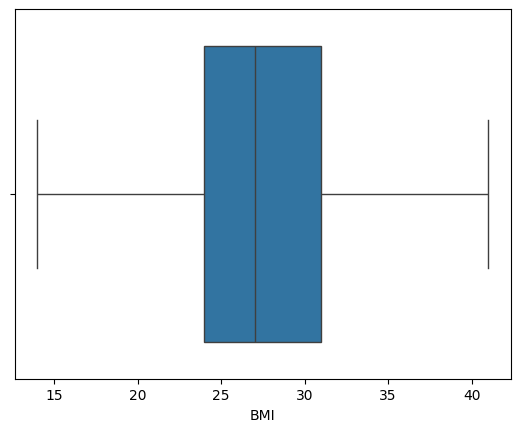

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot to visualize the distribution and outliers in the 'BMI' column
sns.boxplot(data=data_cleaned, x='BMI')
plt.show()


In [77]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
    
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
